<a href="https://colab.research.google.com/github/Zephon-H/notebook/blob/main/%E7%BA%BF%E6%80%A7%E5%9B%9E%E5%BD%92%E5%92%8C%E9%9D%9E%E7%BA%BF%E6%80%A7%E5%9B%9E%E5%BD%92.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 知识框架

### 数学基础
- 微积分
- 线性代数
- 概率统计
### 编程基础
- Python
- C++
### 理论基础
- 有监督学习
- 无监督学习
- 训练集
用来训练，构建模型
- 验证集
用来在模型训练阶段测试模型的好坏
- 测试集
等模型训练好后，再用测试集来评估模型的好坏
- 过拟合
- 梯度下降法
- 正则化
- 代价函数
### 机器学习算法
- 决策树
- KNN
- KMEANS
- SVM
- 线性回归
### 深度学习算法
- BP
- CNN
- LSTM
- GANS
### 实际应用
- 图像识别
- 垃圾邮件分类
- 语音识别

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

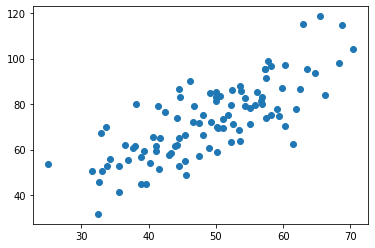

In [ ]:
# 读取数据
data = np.genfromtxt('data.csv', delimiter=',')
x_data = data[:,0]
y_data = data[:,1]
plt.scatter(x_data,y_data)
plt.show()

In [ ]:
# 学习率
learning_rate = 0.0001
# 截距
b = 0
# 斜率
k = 0
# 最大迭代数
epochs = 100

# 最小二乘法
def compute_error(b, k, x_data, y_data):
  total_error = 0
  for i in range(0,len(x_data)):
    total_error += (y_data[i] - (k*x_data[i] + b)) ** 2
  return total_error / float(len(x_data)) / 2.0

# 梯度下降
def gradient_decscent_runner(x_data, y_data, b, k, learning_rate, epochs):
  # 计算总数据量
  m = float(len(x_data))
  for i in range(epochs):
    b_grad = 0
    k_grad = 0
    # 计算梯度的总和再求平均
    for j in range(0, len(x_data)):
      b_grad += (1/m) * ((k * x_data[j] + b) - y_data[j])
      k_grad += (1/m) * x_data[j] * ((k * x_data[j] + b) - y_data[j])
    # 更新b和k
    b = b - learning_rate*b_grad
    k = k - learning_rate*k_grad
    # 每迭代5次，输出一次图像
    # if i % 5 == 0:
    #   print("epochs:",i)
    #   print(compute_error(b,k,x_data,y_data))
    #   plt.plot(x_data, y_data, 'b. ')
    #   plt.plot(x_data, k*x_data + b, 'r')
    #   plt.show()
  return b, k

b=0.032071915131595685,k=1.4788617416703924,error=56.32443049894261


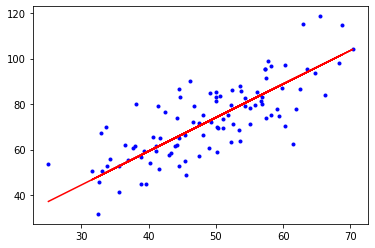

In [ ]:
b, k = gradient_decscent_runner(x_data, y_data, b, k, learning_rate, epochs)
print("b={0},k={1},error={2}".format(b, k, compute_error(b,k,x_data,y_data)))
plt.plot(x_data, y_data, 'b.')
plt.plot(x_data, k*x_data + b, 'r')
plt.show()

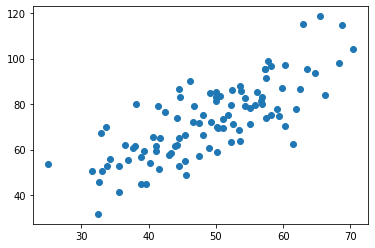

In [ ]:
# 读取数据
data = np.genfromtxt('data.csv', delimiter=',')
x_data = data[:,0]
y_data = data[:,1]
plt.scatter(x_data,y_data)
plt.show()

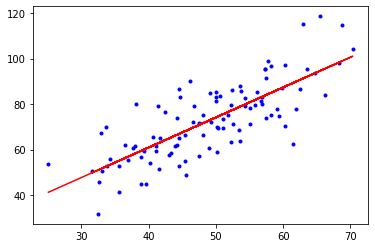

In [ ]:
# 导入线性回归模型
from sklearn.linear_model import LinearRegression
x_data = data[:, 0, np.newaxis]
y_data = data[:, 1, np.newaxis]
# 创建并拟合模型
model = LinearRegression()
model.fit(x_data, y_data)
plt.plot(x_data, y_data, 'b.')
plt.plot(x_data, model.predict(x_data), 'r')
plt.show()

## 多元线性回归

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [ ]:
data = np.genfromtxt('Delivery.csv',delimiter=',')
x_data = data[:,:-1]
y_data = data[:,-1]
x_data,y_data

(array([[100.,   4.],
        [ 50.,   3.],
        [100.,   4.],
        [100.,   2.],
        [ 50.,   2.],
        [ 80.,   2.],
        [ 75.,   3.],
        [ 65.,   4.],
        [ 90.,   3.],
        [ 90.,   2.]]),
 array([9.3, 4.8, 8.9, 6.5, 4.2, 6.2, 7.4, 6. , 7.6, 6.1]))

In [ ]:
lr = 0.0001
theta0 = 0
theta1 = 0
theta2 = 0
epochs = 1000

def compute_error(theta0, theta1, theta2):
  total_error = 0
  for i in range(len(x_data)):
    total_error += (y_data[i] - (theta1 * x_data[i,0] + theta2*x_data[i,1] + theta0)) ** 2
  return total_error / float(len(x_data))

def gradient_descent(x_data, y_data, theta0, theta1, theta2, lr, epochs):
  m = float(len(x_data))
  for i in range(epochs):
      theta0_grad = 0
      theta1_grad = 0
      theta2_grad = 0
      for j in range(len(x_data)):
        theta0_grad += (1/m)*(x_data[j,0]*theta1 + x_data[j,1]*theta2 + theta0 - y_data[j])
        theta1_grad += (1/m)*(x_data[j,0]*theta1 + x_data[j,1]*theta2 + theta0 - y_data[j])*x_data[j,0]
        theta1_grad += (1/m)*(x_data[j,0]*theta1 + x_data[j,1]*theta2 + theta0 - y_data[j])*x_data[j,1]
      theta0 -= lr*theta0_grad
      theta1 -= lr*theta1_grad
      theta2 -= lr*theta2_grad
  return theta0, theta1, theta2

In [ ]:
theta0, theta1, theta2 = gradient_descent(x_data,y_data,theta0,theta1,theta2,lr,epochs)
print("theta0={0},theta1={1},theta2={2},error={3}".format(theta0,theta1,theta2,compute_error(theta0, theta1, theta2)))

theta0=0.006563784947706691,theta1=0.08296819645374055,theta2=0.0,error=0.8851061820669204


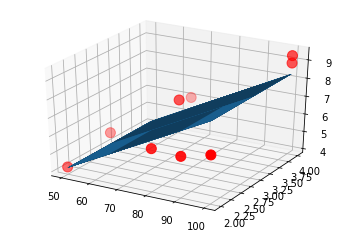

In [ ]:
ax = plt.figure().add_subplot(111, projection= '3d')
ax.scatter(x_data[:,0], x_data[:,1],y_data, c='r', marker='o', s=100)
x0 = x_data[:,0]
x1 = x_data[:,1]
x0, x1 = np.meshgrid(x0,x1)
z = theta0 + x0 * theta1 + x1*theta2
ax.plot_surface(x0,x1,z)
plt.show()

In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_data, y_data)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
print("coefficients:",model.coef_)
print("intercept:",model.intercept_)

coefficients: [0.0611346  0.92342537]
intercept: -0.868701466781709


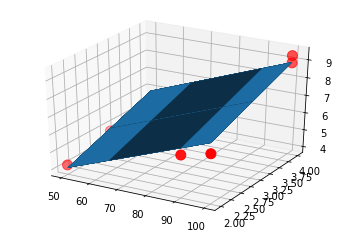

In [ ]:
ax = plt.figure().add_subplot(111, projection= '3d')
ax.scatter(x_data[:,0], x_data[:,1],y_data, c='r', marker='o', s=100)
x0 = x_data[:,0]
x1 = x_data[:,1]
x0, x1 = np.meshgrid(x0,x1)
z = model.intercept_ + x0*model.coef_[0] + x1*model.coef_[1]
ax.plot_surface(x0,x1,z)
plt.show()

## 多项式回归
$$
\theta_0 + \theta_1x+\theta_2x^2+\cdots
$$


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

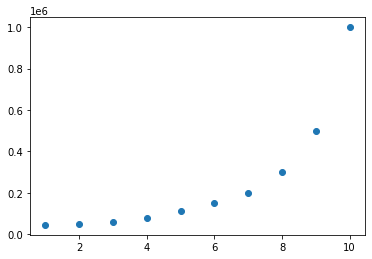

In [ ]:
data = np.genfromtxt('job.csv', delimiter=',')
x_data = data[1:,1]
y_data = data[1:,2]
plt.scatter(x_data,y_data)

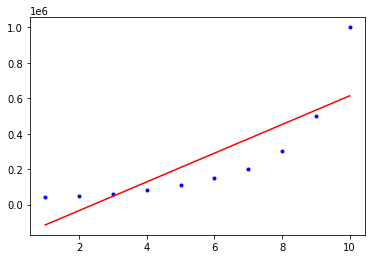

In [ ]:
x_data = data[1:,1,np.newaxis]
y_data = data[1:,2,np.newaxis]
model = LinearRegression()
model.fit(x_data,y_data)
plt.plot(x_data,y_data,'b.')
plt.plot(x_data,model.predict(x_data),'r')
plt.show()

In [ ]:
# 定义多项式回归，degree可以调节多项式的特征
poly_reg = PolynomialFeatures(degree=3)
# 特征处理
x_poly = poly_reg.fit_transform(x_data)
# 定义回归模型
lin_reg = LinearRegression()
# 训练模型
lin_reg.fit(x_poly, y_data)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

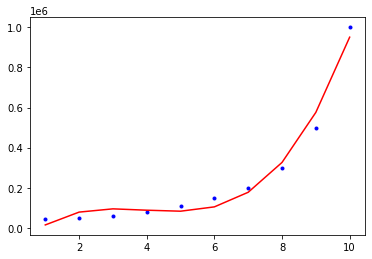

In [ ]:
plt.plot(x_data, y_data, 'b.')
plt.plot(x_data, lin_reg.predict(poly_reg.fit_transform(x_data)), c='r')
plt.show()

## 标准方程法
$$
w = (X^TX)^{-1}X^Ty
$$

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

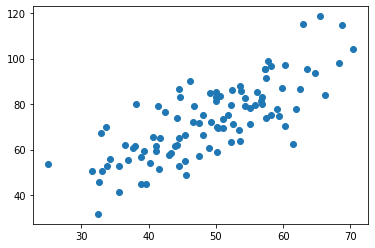

In [ ]:
data = np.genfromtxt('data.csv', delimiter=',')
x_data = data[:,0,np.newaxis]
y_data = data[:,1,np.newaxis]
plt.scatter(x_data, y_data)
plt.show()

In [ ]:
X_data = np.concatenate((np.ones((100,1)),x_data),axis=1)

In [ ]:
# 标准方程法求解回归参数
# w = (X^TX)^(-1)X^Ty
def weights(xArr, yArr):
  xMat = np.mat(xArr)
  yMat = np.mat(yArr)
  xTx = xMat.T * xMat
  if np.linalg.det(xTx) == 0.0:
    return
  ws = xTx.I * xMat.T * yMat
  return ws

In [ ]:
ws = weights(X_data,y_data)
ws

matrix([[7.99102098],
        [1.32243102]])

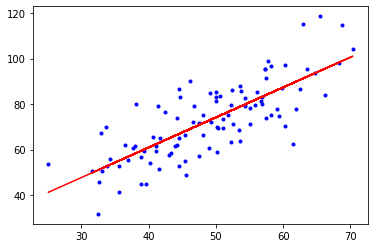

In [ ]:
plt.plot(x_data,y_data, 'b.')
plt.plot(x_data,ws[0] + x_data*ws[1], 'r')
plt.show()

## 特征缩放
### 数据归一化
$$
新值 = \frac{旧值-最小值}{最大值-最小值}
$$
newValue = (oldValue-min) / (max-min)

### 均值标准化
$$
新值 = \frac{旧值 - 平均值}{方差}
$$
newValue = (oldValue - u) / s(u：平均值，s:方差)

## 防止过拟合
1. 减少特征
2. 增加数据量
3. 正则化(Regularized)

### 正则化

正则化个代价函数

- L1正则化：
$$
J(\theta) = \frac{1}{2m} [\sum_{i=1}^m(h_\theta(x^{(i)})-y^{(i)})^2 + \lambda \sum_{j=1}^n \theta_j^2 \ ]
$$
- L2正则化：
$$
J(\theta) = \frac{1}{2m} [\sum_{i=1}^m(h_\theta(x^{(i)})-y^{(i)})^2 + \lambda \sum_{j=1}^n |\theta_j| \ ]
$$

## 岭回归(Ridge Regression)
标准方程法中如果数据的特征比样本点还多，数据特征n，样本个数m，如果n>m,则计算$(X^TX)^{-1}$时会出错，因为$(X^TX)$不是满秩矩阵，所以不可逆。 

为解决这个问题，引入岭回归的概念
$$
w = (X^TX+\lambda I)^{-1}X^Ty
$$
$\lambda$ 为岭系数，$I$为单位矩阵

$$
J(\theta) = \frac{1}{2} \sum_{i=1}^n (h_\theta(x_i)-y_i)^2 + \lambda \sum_i^n \theta_i^2 \\
J(\theta) = \frac{1}{2} (X \theta - Y)^T (X\theta - Y) + \lambda \theta^T \theta \\
\frac{\partial J(\theta)}{\partial \theta} = X^TX\theta - X^T Y + \lambda \theta \\
\theta = (X^TX + \lambda I)^{-1}X^TY
$$

## sklearn-岭回归

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model

In [ ]:
data = np.genfromtxt('longley.csv', delimiter = ',')
data

array([[     nan,      nan,      nan,      nan,      nan,      nan,
             nan,      nan],
       [     nan,   83.   ,  234.289,  235.6  ,  159.   ,  107.608,
        1947.   ,   60.323],
       [     nan,   88.5  ,  259.426,  232.5  ,  145.6  ,  108.632,
        1948.   ,   61.122],
       [     nan,   88.2  ,  258.054,  368.2  ,  161.6  ,  109.773,
        1949.   ,   60.171],
       [     nan,   89.5  ,  284.599,  335.1  ,  165.   ,  110.929,
        1950.   ,   61.187],
       [     nan,   96.2  ,  328.975,  209.9  ,  309.9  ,  112.075,
        1951.   ,   63.221],
       [     nan,   98.1  ,  346.999,  193.2  ,  359.4  ,  113.27 ,
        1952.   ,   63.639],
       [     nan,   99.   ,  365.385,  187.   ,  354.7  ,  115.094,
        1953.   ,   64.989],
       [     nan,  100.   ,  363.112,  357.8  ,  335.   ,  116.219,
        1954.   ,   63.761],
       [     nan,  101.2  ,  397.469,  290.4  ,  304.8  ,  117.388,
        1955.   ,   66.019],
       [     nan,  104.6  ,  4

In [ ]:
# 切分数据
x_data = data[1:,2:]
y_data = data[1:,1]
x_data,y_data

(array([[ 234.289,  235.6  ,  159.   ,  107.608, 1947.   ,   60.323],
        [ 259.426,  232.5  ,  145.6  ,  108.632, 1948.   ,   61.122],
        [ 258.054,  368.2  ,  161.6  ,  109.773, 1949.   ,   60.171],
        [ 284.599,  335.1  ,  165.   ,  110.929, 1950.   ,   61.187],
        [ 328.975,  209.9  ,  309.9  ,  112.075, 1951.   ,   63.221],
        [ 346.999,  193.2  ,  359.4  ,  113.27 , 1952.   ,   63.639],
        [ 365.385,  187.   ,  354.7  ,  115.094, 1953.   ,   64.989],
        [ 363.112,  357.8  ,  335.   ,  116.219, 1954.   ,   63.761],
        [ 397.469,  290.4  ,  304.8  ,  117.388, 1955.   ,   66.019],
        [ 419.18 ,  282.2  ,  285.7  ,  118.734, 1956.   ,   67.857],
        [ 442.769,  293.6  ,  279.8  ,  120.445, 1957.   ,   68.169],
        [ 444.546,  468.1  ,  263.7  ,  121.95 , 1958.   ,   66.513],
        [ 482.704,  381.3  ,  255.2  ,  123.366, 1959.   ,   68.655],
        [ 502.601,  393.1  ,  251.4  ,  125.368, 1960.   ,   69.564],
        [ 518.173,  

In [ ]:
# 创建模型
# 生成50个值(岭系数lambda)
alphas_to_test = np.linspace(0.001, 1)
# 创建模型，保存误差值
# Ridge：岭回归；CV：交叉验证
model = linear_model.RidgeCV(alphas=alphas_to_test, store_cv_values=True)
model.fit(x_data,y_data)
# 岭系数 
print(model.alpha_)
# loss
print(model.cv_values_.shape)

0.40875510204081633
(16, 50)


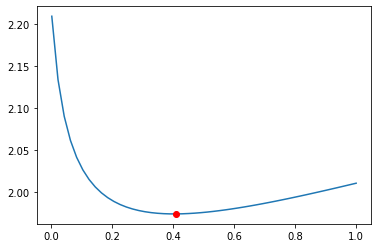

In [ ]:
# 岭系数和loss值的关系
plt.plot(alphas_to_test, model.cv_values_.mean(axis=0))
# 选取岭系数值的位置
plt.plot(model.alpha_, min(model.cv_values_.mean(axis=0)),'ro')
plt.show()

## 自定义岭回归

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model

In [ ]:
data = np.genfromtxt('longley.csv', delimiter = ',')
# 切分数据
x_data = data[1:,2:]
y_data = data[1:,1,np.newaxis]
x_data.shape

(16, 6)

In [ ]:
# 给样本添加偏置项
X_data = np.hstack([np.ones((16,1)),x_data])
X_data.shape

(16, 7)

In [ ]:
# 标准方程法-岭回归 求解回归参数
def weights_l(xArr, yArr, lam = 0.2):
  xMat = np.mat(xArr)
  yMat = np.mat(yArr)
  xTxMat = xMat.T * xMat
  rxTx = xTxMat + np.eye(xMat.shape[1]) * lam
  # 计算矩阵值行列式，判断是否有逆矩阵
  if np.linalg.det(rxTx) == 0.0:
    return
  ws = rxTx.I * xMat.T * yMat
  return ws

In [ ]:
weights_l(X_data,y_data)

matrix([[ 7.38107884e-04],
        [ 2.07703836e-01],
        [ 2.10076376e-02],
        [ 5.05385441e-03],
        [-1.59173066e+00],
        [ 1.10442920e-01],
        [-2.42280461e-01]])

## LASSO

通过构造一个一阶惩罚函数获得一个精炼的模型；通过最终确定一些指标(变量）系数为零(岭回归估计系数等于0的机会微乎其微，造成筛选变量困难)，解释力很强

擅长处理具有多重共线性的数据，与岭回归一样是有偏估计

代价函数
$$
J(\theta) = \frac{1}{2m} [\sum_{i=1}^m (h_\theta (x^{(i)}-y^{(i)})^2 + \lambda \sum_{j=1}^n|\theta_j|]
$$

### sklearn-LASSO

In [ ]:
import numpy as np
from sklearn import linear_model

In [ ]:
data = np.genfromtxt('longley.csv', delimiter=',')
x_data = data[1:,2:]
y_data = data[1:,1]
model = linear_model.LassoCV()
model.fit(x_data,y_data)
print(model.alpha_)# lasso系数
print(model.coef_) # 相关系数 

14.134043936116361
[0.10093575 0.00586331 0.00599214 0.         0.         0.        ]


## 弹性网(Elastic Net)
$$
J(\theta) = \frac{1}{2m} [\sum_{i=1}^m(h_\theta (x^{(i)}) - y^{(i)})^2 + \lambda \sum_{j=1}^n|\theta_j|^q \ ]
$$
![](https://gitee.com/Zephon-H/ImagesStore/raw/master/img/20201207171843.png)

$$
\lambda \sum_{j=1}^n (\alpha \theta_j^2 + (1-\alpha) |\theta_j|)
$$

### sklearn-弹性网

In [ ]:
import numpy as np
from sklearn import linear_model
data = np.genfromtxt('longley.csv', delimiter=',')
x_data = data[1:,2:]
y_data = data[1:,1]
model = linear_model.ElasticNetCV()
model.fit(x_data,y_data)

print(model.alpha_)
print(model.coef_)

30.31094405430269
[0.1006612  0.00589596 0.00593021 0.         0.         0.        ]
